In [ ]:
# Install RDKit.
%%capture
!pip install rdkit

#Aula 03: Representação de Moléculas 2D
Aqui aprenderemos como visualizar nossa molécula em 2D e 3D.

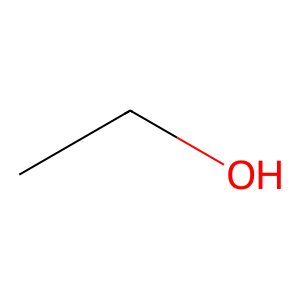

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

# Defina uma molécula a partir de um SMILES
mol = Chem.MolFromSmiles('CCO')  # Etanol

# Gere uma representação 2D da molécula
img = Draw.MolToImage(mol)

# Salvando a imagem em um arquivo
img.save('mol2d.png')

img

##Computando coordenadas 2D de uma molécula

In [ ]:
from rdkit.Chem import AllChem

# Criando uma molécula a partir de um SMILES
mol = Chem.MolFromSmiles('C1=CC=C(C=C1)O')

# Gerando as coordenadas 2D
AllChem.Compute2DCoords(mol) #armazenamos a informação da coordenada na molécula

# Acessando as coordenadas 2D
coords = mol.GetConformer().GetPositions()

# Exibindo as coordenadas 2D
for i in range(mol.GetNumAtoms()):
    atom = mol.GetAtomWithIdx(i)
    print(f'Atom {atom.GetSymbol()}: x={coords[i][0]}, y={coords[i][1]}')

Atom C: x=1.9285714285714288, y=0.0
Atom C: x=1.178571428571428, y=-1.2990381056766587
Atom C: x=-0.32142857142857206, y=-1.2990381056766578
Atom C: x=-1.0714285714285716, y=1.8369701987210302e-16
Atom C: x=-0.32142857142857106, y=1.2990381056766582
Atom C: x=1.178571428571429, y=1.299038105676658
Atom O: x=-2.571428571428571, y=2.220446049250313e-16


##Identificação de estruturas em comum entre moléculas utilizando coordenadas 2D

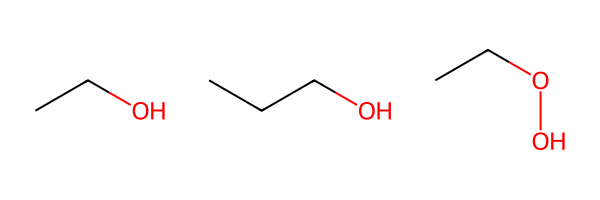

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# Defina o template e calcule suas coordenadas 2D
template = Chem.MolFromSmiles('CCO')
AllChem.Compute2DCoords(template)

# Crie moléculas a partir dos SMILES
smiles_list = ['CCO', 'CCCO', 'CCOO']
ms = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Gere as coordenadas 2D correspondentes às do template
for m in ms:
    AllChem.GenerateDepictionMatching2DStructure(m, template)

# Imprima as moléculas
img = Draw.MolsToGridImage(ms, molsPerRow=len(smiles_list))
img


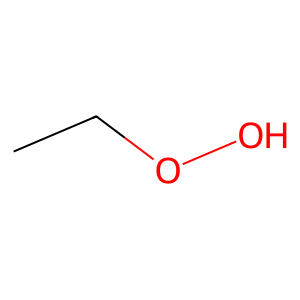

In [ ]:

# Defina uma molécula a partir de um SMILES
mol = Chem.MolFromSmiles('CCOO')
img = Draw.MolToImage(mol)

img

##Criando representações em 3D:

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Crie uma molécula a partir do SMILES
mol = Chem.MolFromSmiles('CCO')

# Gere as coordenadas 3D otimizadas
mol = Chem.AddHs(mol)  # Adicione hidrogênios
AllChem.EmbedMolecule(mol, randomSeed=42)  # Gere coordenadas 3D
AllChem.MMFFOptimizeMolecule(mol)  # Otimize as coordenadas 3D

# Salve a molécula em um formato que suporta coordenadas 3D, como SDF
Chem.MolToMolFile(mol, 'mol_com_coordenadas_3d.sdf')

##Referências da Aula

###Programa para visualizar moléculas em 3D
https://avogadro.cc/

https://pymol.org/